## [Installing Tensorflow / Keras](https://www.tensorflow.org/install)

In [2]:
# Imports

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical, plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem: **Credit Card Fraud Detection**
### Given a list of 28 anonimyzed features and the amount of money involved in a credt card transaction, predict whether the transaction is likely to be fraudulent.
### Source: https://www.kaggle.com/mlg-ulb/creditcardfraud/

In [3]:
# Preview dataset

df = pd.read_csv('creditcard.csv')
df.drop(['Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(len(df))

284807


In [5]:
# Check the proportion of the classes

df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:ylabel='Class'>

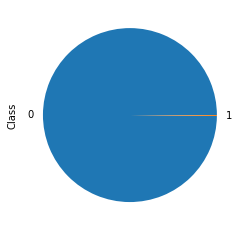

In [6]:
df['Class'].value_counts(normalize=True).plot(kind='pie')

In [7]:
# Define the input and the output

y = df.pop('Class').values
X = df.values

In [8]:
# Assemble the network

model = Sequential([
    Dense(16, input_shape=(29,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=1e-3), metrics=['categorical_accuracy'])

In [9]:
# View the network - layer by layer

plot_model(model, show_shapes=True, rankdir='LR')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [10]:
model.layers

In [11]:
layer1, layer2, layer3 = model.layers

In [12]:
# View the shapes of weights and biases for each layer

l1_weight, l1_bias = layer1.weights
print(l1_weight.shape)
print(l1_bias.shape)

(29, 16)
(16,)


In [13]:
l2_weight, l2_bias = layer2.weights
print(l2_weight.shape)
print(l2_bias.shape)

(16, 8)
(8,)


In [14]:
l3_weight, l3_bias = layer3.weights
print(l3_weight.shape)
print(l3_bias.shape)

(8, 2)
(2,)


In [15]:
# Train the model

history = model.fit(X, y, batch_size=128, epochs=30)

Epoch 1/30
2226/2226 [==============================] - 2s 590us/step - loss: 0.1794 - categorical_accuracy: 0.9629
Epoch 2/30
2226/2226 [==============================] - 1s 583us/step - loss: 0.1216 - categorical_accuracy: 0.9975
Epoch 3/30
2226/2226 [==============================] - 1s 594us/step - loss: 0.0876 - categorical_accuracy: 0.9991
Epoch 4/30
2226/2226 [==============================] - 1s 660us/step - loss: 0.0608 - categorical_accuracy: 0.9997
Epoch 5/30
2226/2226 [==============================] - 1s 670us/step - loss: 0.0422 - categorical_accuracy: 0.9998
Epoch 6/30
2226/2226 [==============================] - 1s 658us/step - loss: 0.0338 - categorical_accuracy: 0.9999
Epoch 7/30
2226/2226 [==============================] - 1s 625us/step - loss: 0.0267 - categorical_accuracy: 0.9997
Epoch 8/30
2226/2226 [==============================] - 1s 628us/step - loss: 0.0240 - categorical_accuracy: 0.9996
Epoch 9/30
2226/2226 [==============================] - 1s 668us/step - 

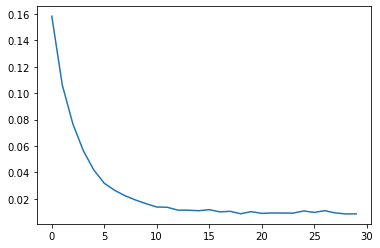

In [16]:
# Plot the loss across epochs

plt.plot(history.history['loss'], label='Loss')

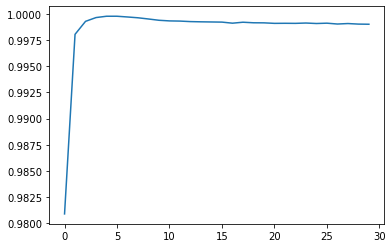

In [17]:
# Plot the accuracy across epochs

plt.plot(history.history['categorical_accuracy'], label='Accuracy')